그레디언트 부스팅 (Gradient Boosting) : 이진 트리의 오차를 보완하는 방식으로 순차적 학습

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=1)

In [ ]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [ ]:
model.score(x_test, y_test)

0.9649122807017544

In [ ]:
params = {
    "n_estimators" : range(100, 300, 50),
    "max_depth" : [1, 2, 3, 4, 5],
    "learning_rate" : [0.0001, 0.001, 0.01, 0.1]
}

# n_jobs (병렬 연산에 사용할 CPU 코어 수) 사용 불가!! (순차적이라서)
model = GradientBoostingClassifier(random_state=1)

In [ ]:
gscv = GridSearchCV(model, params, n_jobs=-1)
gscv.fit(x_train, y_train)

,estimator,GradientBoost...andom_state=1)
,param_grid,"{'learning_rate': [0.0001, 0.001, ...], 'max_depth': [1, 2, ...], 'n_estimators': range(100, 300, 50)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [ ]:
print(f"score : {gscv.score(x_test, y_test)}")
print(f"best params : {gscv.best_params_}")
print(f"best valid score : {gscv.best_score_}")
print(f"best modek : {gscv.best_estimator_}")

score : 0.9473684210526315
best params : {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
best valid score : 0.9582417582417582
best modek : GradientBoostingClassifier(max_depth=4, random_state=1)


<Axes: >

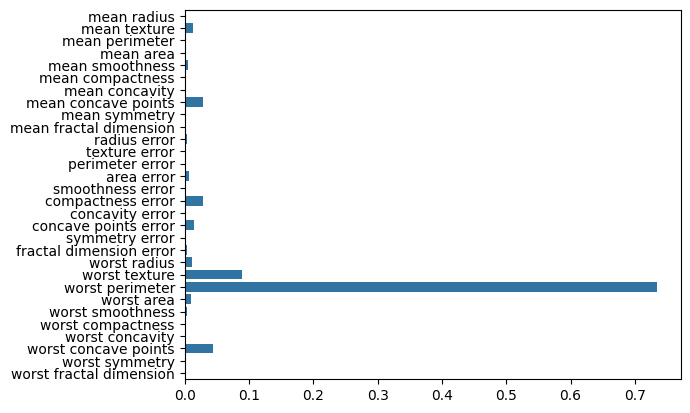

In [ ]:
sns.barplot(x=gscv.best_estimator_.feature_importances_, y=cancer.feature_names)

AdaBoost (Adaptive Boosting) : Gradient Boosting과 비슷 (이전 모델이 잘못 분류한 샘플의 가중치를 높여서 학습)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier(random_state=1)

In [ ]:
model.fit(x_train, y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,1


In [ ]:
model.score(x_test, y_test)

0.9736842105263158

<Axes: >

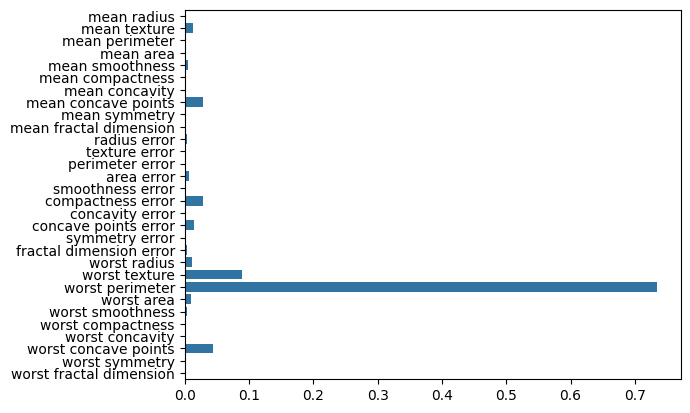

In [ ]:
sns.barplot(x=gscv.best_estimator_.feature_importances_, y=cancer.feature_names)